In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Content
Indian cuisine consists of a variety of regional and traditional cuisines native to the Indian subcontinent. Given the diversity in soil, climate, culture, ethnic groups, and occupations, these cuisines vary substantially and use locally available spices, herbs, vegetables, and fruits. Indian food is also heavily influenced by religion, in particular Hinduism, cultural choices and traditions.

This dataset consists of information about various Indian dishes, their ingredients, their place of origin, etc.

**Column Description**

name : name of the dish

ingredients : main ingredients used

diet : type of diet - either vegetarian or non vegetarian

prep_time : preparation time

cook_time : cooking time

flavor_profile : flavor profile includes whether the dish is spicy, sweet, bitter, etc

course : course of meal - starter, main course, dessert, etc

state : state where the dish is famous or is originated

region : region where the state belongs

Presence of -1 in any of the columns indicates NaN value.

In [2]:
#load the food data...
food=pd.read_csv('indian_food.csv')
food.shape

(255, 9)

In [3]:
food.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


In [4]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            255 non-null    object
 1   ingredients     255 non-null    object
 2   diet            255 non-null    object
 3   prep_time       255 non-null    int64 
 4   cook_time       255 non-null    int64 
 5   flavor_profile  255 non-null    object
 6   course          255 non-null    object
 7   state           255 non-null    object
 8   region          254 non-null    object
dtypes: int64(2), object(7)
memory usage: 18.1+ KB


In [5]:
food.dropna(inplace=True)

In [6]:
#check he value count vegetarian and Non-vegetarian...
food['diet'].value_counts()

vegetarian        225
non vegetarian     29
Name: diet, dtype: int64

In [7]:
#here we know that the number of vegetarians are more than non-vegetarians....
#now visualizing the above information with the help of pie plot...

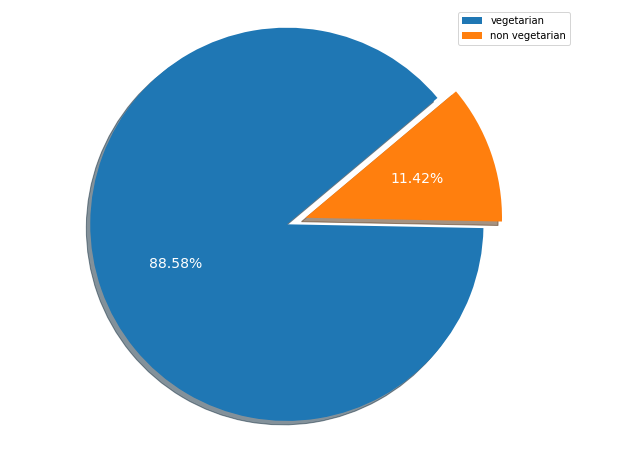

In [8]:
plt.figure(figsize=(10,8))
plt.pie(x=food['diet'].value_counts(),labels=list(food['diet'].value_counts().keys()),
        autopct='%1.2f%%',explode=(0.1,0),startangle=40,shadow=True,textprops={'fontsize': 14,
                        'color':'w'})
plt.legend()
plt.axis('equal')
plt.show()

In [9]:
#check the flavor of dishes for knowing which dish made most...
food['flavor_profile'].value_counts()

spicy     133
sweet      87
-1         29
bitter      4
sour        1
Name: flavor_profile, dtype: int64

In [10]:
#dropping those values where -1 is present in the flavor_profile,because -1 represent no information
food=food[food['flavor_profile']!='-1']
food['flavor_profile'].value_counts()

spicy     133
sweet      87
bitter      4
sour        1
Name: flavor_profile, dtype: int64

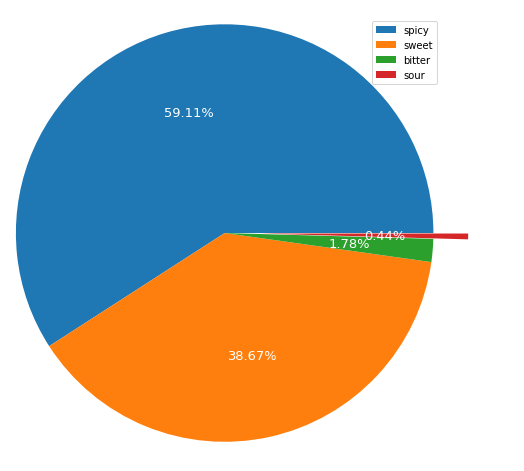

In [11]:
#we clearly see that spicy disesh made most ,may be most of the peoples like spicy 
#visualizing the abaove info ...
plt.figure(figsize=(10,8))
explode=(0,0,0,0.2)
plt.pie(food['flavor_profile'].value_counts(),labels=list(food['flavor_profile'].value_counts().keys()),
       autopct='%1.2f%%',textprops={'fontsize':13,'color':'w'},explode=explode,radius=1.2)
plt.legend()
plt.show()

In [16]:
#check which course to take  most of the peoples...
food['course'].value_counts()

main course    103
dessert         84
snack           36
starter          2
Name: course, dtype: int64

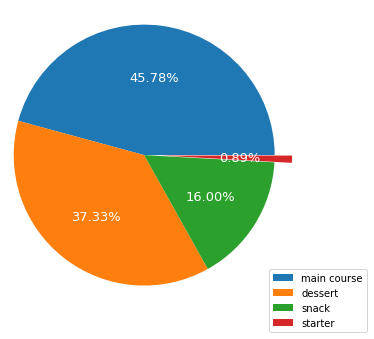

In [38]:
#now we know most of the peoples like directly main course...
#visualizing above information....
plt.pie(food['course'].value_counts(),labels=list(food['course'].value_counts().keys()),
       textprops={'fontsize':13,'color':'w'},radius=1.5,explode=[0,0,0,0.2],autopct='%.2f%%')
plt.legend(bbox_to_anchor=(1.3,0),loc=9)
plt.show()

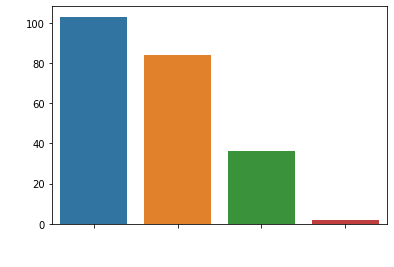

In [48]:
sns.barplot(x=food['course'].value_counts().keys(),y=food['course'].value_counts())
plt.xlabel('Course',color='w',fontsize=15)
plt.ylabel('Course Counts',color='w',fontsize=15)
plt.xticks(color='w')
plt.show()

In [52]:
#state column also some values are -1 dropping them...
food=food[food['state']!='-1']
food.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


In [74]:
#checking which state prefer which diet most...
veg_food=food[food['diet']=='vegetarian']
veg_food['state'].value_counts()

Gujarat            32
Punjab             26
Maharashtra        24
West Bengal        18
Tamil Nadu         15
Andhra Pradesh     10
Uttar Pradesh       8
Assam               8
Odisha              6
Rajasthan           6
Karnataka           5
Telangana           4
Kerala              4
Bihar               3
Madhya Pradesh      2
Goa                 2
Jammu & Kashmir     2
Haryana             1
Manipur             1
Uttarakhand         1
Chhattisgarh        1
Name: state, dtype: int64

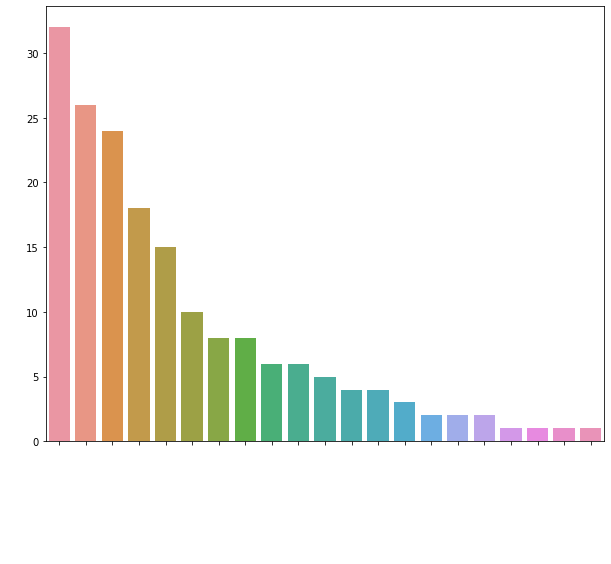

In [75]:
plt.figure(figsize=(10,8))
sns.barplot(x=veg_food['state'].value_counts().keys(),y=veg_food['state'].value_counts())
plt.xlabel('Vegetarian State',color='w',fontsize=15)
plt.ylabel('Vegetarian State Counts',color='w',fontsize=15)
plt.xticks(rotation=90,color='w')
plt.show()

In [76]:
non_veg_food=food[food['diet']=='non vegetarian']
non_veg_food['state'].value_counts()

Assam           9
West Bengal     4
Punjab          4
Maharashtra     2
Telangana       1
Nagaland        1
Goa             1
NCT of Delhi    1
Tripura         1
Kerala          1
Tamil Nadu      1
Name: state, dtype: int64

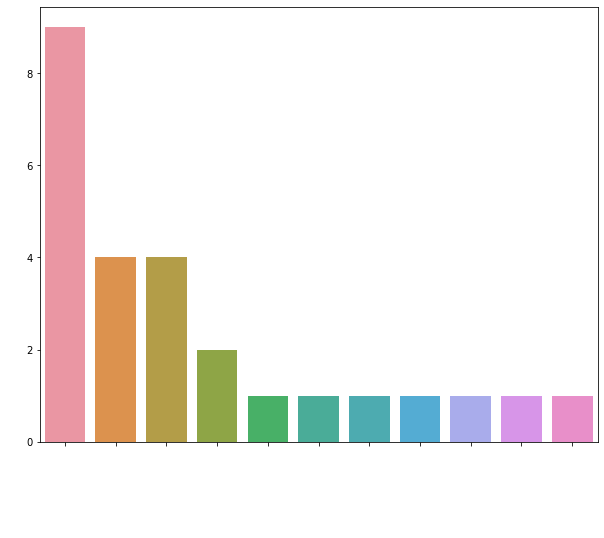

In [77]:
plt.figure(figsize=(10,8))
sns.barplot(x=non_veg_food['state'].value_counts().keys(),y=non_veg_food['state'].value_counts())
plt.xlabel('Non vegetarian State',color='w',fontsize=15)
plt.ylabel('Non vegetarian State Counts',color='w',fontsize=15)
plt.xticks(rotation=90,color='w')
plt.show()

In [78]:
#seeing above information we can say that Gujrat  prefered mostly vegetarian diets... 
#and also we say that Assam prefered nonveg most...


In [83]:
#check vegetarian and non vegetarian value counts by region...

In [79]:
veg_food['region'].value_counts()

West          64
North         41
South         38
East          24
North East     9
Central        3
Name: region, dtype: int64

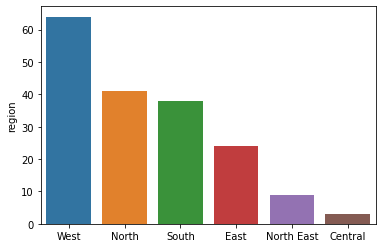

In [85]:
sns.barplot(x=veg_food['region'].value_counts().keys(),y=veg_food['region'].value_counts())
plt.show()

In [82]:
non_veg_food['region'].value_counts()

North East    11
North          5
East           4
West           3
South          3
Name: region, dtype: int64

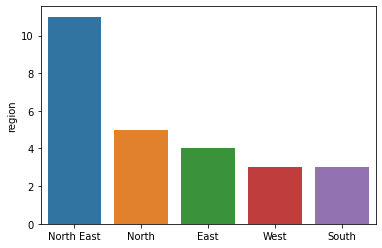

In [86]:
sns.barplot(x=non_veg_food['region'].value_counts().keys(),y=non_veg_food['region'].value_counts())
plt.show()

**Adding new column total time for knowing more information**

In [91]:
food['total_time']=food['prep_time']+food['cook_time']
food.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,total_time
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East,70
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West,110
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North,75
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West,45
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East,55


In [96]:
#removing those rows where time value present as (-)... 
food=food[food['total_time']>0]
food.tail(10)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,total_time
226,Masor tenga,"Ridge gourd, fish, lemon, tomatoes, mustard oil",non vegetarian,15,25,spicy,main course,Assam,North East,40
232,Chingri malai curry,"Coconut milk, lobster, fresh green chilli, gin...",non vegetarian,10,40,spicy,main course,West Bengal,East,50
233,Goja,"Baking soda, clarified butter, oil, all purpos...",vegetarian,20,60,sweet,dessert,West Bengal,East,80
235,Haq Maas,"Lamb, garam masala powder, curd, turmeric, bay...",non vegetarian,20,40,spicy,main course,Assam,North East,60
243,Mishti Chholar Dal,"Chana dal, fresh coconut, ginger, cinnamon, ra...",vegetarian,10,30,sweet,main course,West Bengal,East,40
247,Prawn malai curry,"Coconut milk, prawns, garlic, turmeric, sugar",non vegetarian,15,50,spicy,main course,West Bengal,East,65
249,Shukto,"Green beans, bitter gourd, ridge gourd, banana...",vegetarian,10,20,spicy,main course,West Bengal,East,30
250,Til Pitha,"Glutinous rice, black sesame seeds, gur",vegetarian,5,30,sweet,dessert,Assam,North East,35
251,Bebinca,"Coconut milk, egg yolks, clarified butter, all...",vegetarian,20,60,sweet,dessert,Goa,West,80
253,Mawa Bati,"Milk powder, dry fruits, arrowroot powder, all...",vegetarian,20,45,sweet,dessert,Madhya Pradesh,Central,65


In [123]:
plt.figure(figsize=(10,8))
fig=px.scatter(food,x='cook_time',y='prep_time',color='diet',
                 color_discrete_sequence=['blue','red'], hover_data = ['name'],
                 labels={
                     'cook_time': 'Cooking time',
                     'prep_time': 'Preparation time'
                 })
fig.show()

<Figure size 720x576 with 0 Axes>

### most of the disesh take between 0 to 100 minutes to cook...

In [98]:
#know which diet take more total time to cook...
result=food.groupby('diet').sum()
result

,prep_time,cook_time,total_time
diet,,,
non vegetarian,770,710,1480
vegetarian,4755,6676,11431


In [100]:
#cheking which dish took more time to cook...
dessert=food[food['course']=='dessert']
main_course=food[food['course']=='main course']
starter=food[food['course']=='starter']
snack=food[food['course']=='snack']

## Time available is minutes...

### total time had taken by dessert to cook...

In [126]:
fig=px.bar(data_frame=dessert,y='name',x='total_time',orientation='h',color='total_time',
          labels={'name':'Name of dishes','total_time':'Total Time'})
fig.show()

### total time had taken by  main course to cook...

In [127]:
fig=px.bar(data_frame=main_course,x='total_time',y='name',color='total_time',
          orientation='h',labels={'name':'Name of Dishes','total_time':'Total Time '})
fig.show()

### total time had taken by starter to cook...

In [128]:
fig=px.bar(data_frame=starter,x='total_time',y='name',color='total_time',
          orientation='h',labels={'name':'Name of Dishes','total_time':'Total Time '})
fig.show()

### total time had taken by snack to cook...

In [129]:
fig=px.bar(data_frame=snack,x='total_time',y='name',color='total_time',
          orientation='h',labels={'name':'Name of Dishes','total_time':'Total Time '})
fig.show()